In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# **DATA CLEANING**

## *Import data*

### 2015 Flight Data

In [87]:
#read flight information data from 2015
flights_df=pd.read_csv(r"C:\Users\kirst\Desktop\Capstone2\FlightDelays\flights.csv", header = 0, low_memory=False)
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Airline Description

In [88]:
#read airline codes and descriptions
airlines_df=pd.read_csv(r"C:\Users\kirst\Desktop\Capstone2\FlightDelays\datasets_810_1496_airlines.csv", header = 0)
airlines_df.rename(columns={"IATA_CODE": "AIRLINE", "AIRLINE": "airline_name"}, inplace = True)
airlines_df.head()

,AIRLINE,airline_name
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


### Airport Information

In [89]:
#read airport information
airports_df=pd.read_csv(r"C:\Users\kirst\Desktop\Capstone2\FlightDelays\aiport_codes.csv", header = 0)
airports_df.head()

,IATA_CODE,5DIGIT_IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ADK,10165,Adak Airport,Adak,AK,USA,51.87796,-176.64603
1,ANC,10299,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
2,BRW,10754,Wiley Post-Will Rogers Memorial Airport,Barrow,AK,USA,71.28545,-156.76600
3,BET,10551,Bethel Airport,Bethel,AK,USA,60.77978,-161.83800
4,CDV,10926,Merle K. (Mudhole) Smith Airport,Cordova,AK,USA,60.49183,-145.47765


## Merge all 3 dataframes together using a left join on flights_df to create df with all information.

### Add airline_name to dataframe 
<ul>
<li>Merge flight data with airline data using a left join to bring in the airline name into the dataframe</li>
</ul>


In [90]:
#merge flight data with airline data
df_flightsairlines = pd.merge(flights_df, airlines_df, how='left', on=['AIRLINE'])
### Add airline_name to dataframe 
Merge flight data with airline data using a left join to bring in the airline name into the dataframedf_flightsairlines.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,airline_name
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


### Add ORIGIN AIRPORT information to dataframe
<ul>
<li>Merge the new dataframe created above with the airports data using a left join to bring in Origin Airport information. Rename columns to include Origin in the name.</li>
</ul>


In [227]:
#merge flight and airline data with origin_airport information
origin_airport_df = pd.merge(df_flightsairlines, airports_df, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
origin_airport_df.rename(columns={'5DIGIT_IATA_CODE': 'ORIGIN_5DIGIT_IATA_CODE', 'AIRPORT': 'ORIGIN_AIRPORT_DESC', 'CITY': 'ORIGIN_CITY', 'STATE': 'ORIGIN_STATE', 'LATITUDE': 'ORIGIN_LATITUDE', 'LONGITUDE': 'ORIGIN_LONGITUDE'}, inplace = True)
origin_airport_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WEATHER_DELAY,airline_name,IATA_CODE,ORIGIN_5DIGIT_IATA_CODE,ORIGIN_AIRPORT_DESC,ORIGIN_CITY,ORIGIN_STATE,COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,Alaska Airlines Inc.,ANC,10299.0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,American Airlines Inc.,LAX,12892.0,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,US Airways Inc.,SFO,14771.0,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,American Airlines Inc.,LAX,12892.0,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,Alaska Airlines Inc.,SEA,14747.0,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


### Add DESTINATION_AIRPORT information to dataframe
<ul>
<li>Merge the new dataframe created above with the airports data again using a left join to bring in Destination Airport information. Rename columns to include Destination in the name.</li>
<li>Added new column 'month_s' to dataframe with abbreviated name of the month.</li>
</ul>

In [228]:
#merge destination_airport info with flight, airline, and origin_airport information
destination_airport_df = pd.merge(origin_airport_df, airports_df, how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')

#add month name to dataframe
destination_airport_df['month_s'] = pd.to_datetime(destination_airport_df['MONTH'], format='%m').dt.month_name().str.slice(stop=3)

#### Delete duplicate columns 

In [230]:
#rename new destination airport columns to include destination
destination_airport_df.rename(columns={'AIRPORT': 'DESTINATION_AIRPORT_DESC', 'CITY': 'DESTINATION_CITY', 'STATE': 'DESTINATION_STATE', 'LATITUDE': 'DESTINATION_LATITUDE', 'LONGITUDE': 'DESTINATION_LONGITUDE', '5DIGIT_IATA_CODE': 'DESTINATION_5DIGIT_IATA_CODE'}, inplace = True)

 #delete duplicate columns from dataframe
del destination_airport_df['IATA_CODE_x']
del destination_airport_df['COUNTRY_y']
del destination_airport_df['IATA_CODE_y']

destination_airport_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5823754 entries, 0 to 5823753
Data columns (total 46 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   YEAR                     int64  
 1   MONTH                    int64  
 2   DAY                      int64  
 3   DAY_OF_WEEK              int64  
 4   AIRLINE                  object 
 5   FLIGHT_NUMBER            int64  
 6   TAIL_NUMBER              object 
 7   ORIGIN_AIRPORT           object 
 8   DESTINATION_AIRPORT      object 
 9   SCHEDULED_DEPARTURE      int64  
 10  DEPARTURE_TIME           float64
 11  DEPARTURE_DELAY          float64
 12  TAXI_OUT                 float64
 13  WHEELS_OFF               float64
 14  SCHEDULED_TIME           float64
 15  ELAPSED_TIME             float64
 16  AIR_TIME                 float64
 17  DISTANCE                 int64  
 18  WHEELS_ON                float64
 19  TAXI_IN                  float64
 20  SCHEDULED_ARRIVAL        int64  
 21  ARRIVAL_

### Completed dataframe

In [285]:
df = destination_airport_df
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,COUNTRY_x,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_5DIGIT_IATA_CODE,DESTINATION_AIRPORT_DESC,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,month_s
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,USA,61.17432,-149.99619,14747.0,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,Jan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,USA,33.94254,-118.40807,14027.0,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559,Jan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,USA,37.61900,-122.37484,11057.0,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313,Jan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,USA,33.94254,-118.40807,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Jan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,USA,47.44898,-122.30931,10299.0,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5823749,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,USA,33.94254,-118.40807,10721.0,Gen. Edward Lawrence Logan International Airport,Boston,MA,42.36435,-71.00518,Dec
5823750,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,USA,40.63975,-73.77893,14254.0,Mercedita Airport,Ponce,PR,18.00830,-66.56301,Dec
5823751,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,USA,40.63975,-73.77893,14843.0,Luis Mua±oz Mara­n International Airport,San Juan,PR,18.43942,-66.00183,Dec
5823752,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,USA,28.42889,-81.31603,14843.0,Luis Mua±oz Mara­n International Airport,San Juan,PR,18.43942,-66.00183,Dec


#### Count number of NaN by column.
<ul>
<il> Large number of blank cells for CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY.</il>
<il>If an aircraft has a delay, the delay is recorded in minutes for that flight. If there is no delay, nothing is recorded explaining the large number of NaN for delays.</il>
</ul>

In [110]:
#number of null entries in each column
df.isna().sum()

YEAR                                  0
MONTH                                 0
DAY                                   0
DAY_OF_WEEK                           0
AIRLINE                               0
FLIGHT_NUMBER                         0
TAIL_NUMBER                       14721
ORIGIN_AIRPORT                        0
DESTINATION_AIRPORT                   0
SCHEDULED_DEPARTURE                   0
DEPARTURE_TIME                    86228
DEPARTURE_DELAY                   86228
TAXI_OUT                          89123
WHEELS_OFF                        89123
SCHEDULED_TIME                        6
ELAPSED_TIME                     105162
AIR_TIME                         105162
DISTANCE                              0
WHEELS_ON                         92602
TAXI_IN                           92602
SCHEDULED_ARRIVAL                     0
ARRIVAL_TIME                      92602
ARRIVAL_DELAY                    105162
DIVERTED                              0
CANCELLED                             0


#### Count number of non null entries by column

In [111]:
df.count()

YEAR                            5823754
MONTH                           5823754
DAY                             5823754
DAY_OF_WEEK                     5823754
AIRLINE                         5823754
FLIGHT_NUMBER                   5823754
TAIL_NUMBER                     5809033
ORIGIN_AIRPORT                  5823754
DESTINATION_AIRPORT             5823754
SCHEDULED_DEPARTURE             5823754
DEPARTURE_TIME                  5737526
DEPARTURE_DELAY                 5737526
TAXI_OUT                        5734631
WHEELS_OFF                      5734631
SCHEDULED_TIME                  5823748
ELAPSED_TIME                    5718592
AIR_TIME                        5718592
DISTANCE                        5823754
WHEELS_ON                       5731152
TAXI_IN                         5731152
SCHEDULED_ARRIVAL               5823754
ARRIVAL_TIME                    5731152
ARRIVAL_DELAY                   5718592
DIVERTED                        5823754
CANCELLED                       5823754


# **INSIGHTS**

In [215]:
#create variable lists
delays = ['AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY'] #all delays
weather_security = ['SECURITY_DELAY','WEATHER_DELAY'] #outside airlines control
aircraft_delays=['AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','AIR_SYSTEM_DELAY'] #within airlines control
cancel_diverted = ['DIVERTED','CANCELLED'] #yes or no
all_variables = ['DIVERTED','CANCELLED','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']

### Total number of cancelled and diverted flights for all airlines in 2015.

#### Total number of diverted flights.

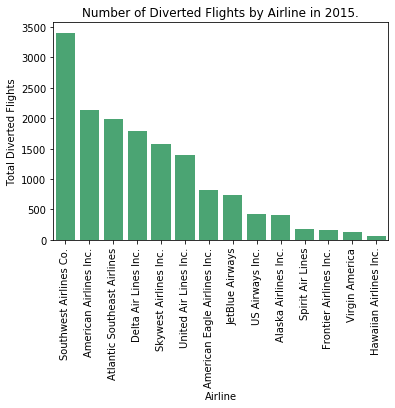

In [155]:
#sort data to plot
diverted_sums = df.groupby(['airline_name']).sum()['DIVERTED']
diverted_sumsdf = pd.DataFrame({'Diverted':diverted_sums})
diverted_df = diverted_sumsdf.sort_values(by='Diverted', ascending=False)

#plot airlines with total number of diverted flights in 2015
sns.barplot(x=diverted_df.index, y='Diverted', data=diverted_df, estimator=sum, color='mediumseagreen').set_title('Number of Diverted Flights by Airline in 2015.')
plt.xlabel('Airline')
plt.ylabel('Total Diverted Flights')
plt.xticks(rotation=90)
plt.show()

<ul>
    <li> American Airlines had 2,130 flights diverted in 2015. </li>
    <li> American Eagle had 816 diverted flights. </li>
    <li> Total of 2,946 diverted flights </li>
</ul>

#### Total number of cancelled flights.

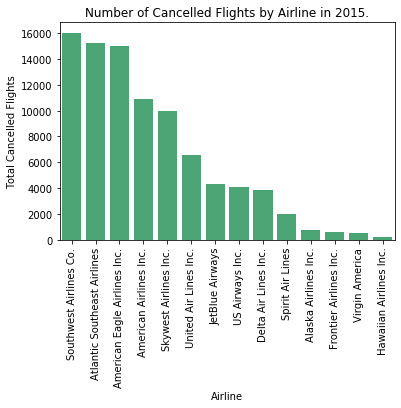

In [156]:
#sort data to plot
cancelled_sums = df.groupby(['airline_name']).sum()['CANCELLED']
cancelled_sumsdf=pd.DataFrame({'Cancelled':cancelled_sums})
cancelled_df = cancelled_sumsdf.sort_values(by='Cancelled', ascending=False)

#plot airlines with total number of cancelled flights in 2015
sns.barplot(x=cancelled_df.index, y='Cancelled', data=cancelled_df, estimator=sum, color='mediumseagreen').set_title('Number of Cancelled Flights by Airline in 2015.')
plt.xlabel('Airline')
plt.ylabel('Total Cancelled Flights')
plt.xticks(rotation=90)
plt.show()

<ul>
    <li> American Airlines had 10,919 cancelled flights in 2015. </li>
    <li> American Eagle Airlines had 15,025. </li> 
    <li> Total of 25,944 cancelled flights </li>
</ul>

#### Total number of cancelled and diverted flights sorted by cancelled flights
<ul>
    <li> American Airlines and American Eagle are both in the top 5 for total cancelled flights.
</ul>

In [278]:
#number of diverted and cancelled flights for all airlines
cancel_diverted_df = df.groupby(["airline_name"]).sum()[cancel_diverted]
cancel_diverted_sorteddf = cancel_diverted_df.sort_values(by='CANCELLED', ascending=False)
cancel_diverted_sorteddf

,DIVERTED,CANCELLED
airline_name,,
Southwest Airlines Co.,3409,16043
Atlantic Southeast Airlines,1994,15231
American Eagle Airlines Inc.,816,15025
American Airlines Inc.,2130,10919
Skywest Airlines Inc.,1581,10003
United Air Lines Inc.,1388,6573
JetBlue Airways,730,4276
US Airways Inc.,425,4067
Delta Air Lines Inc.,1782,3824


#### Created a heatmap to better see which airlines have the most cancelled and diverted flights comparatively. 

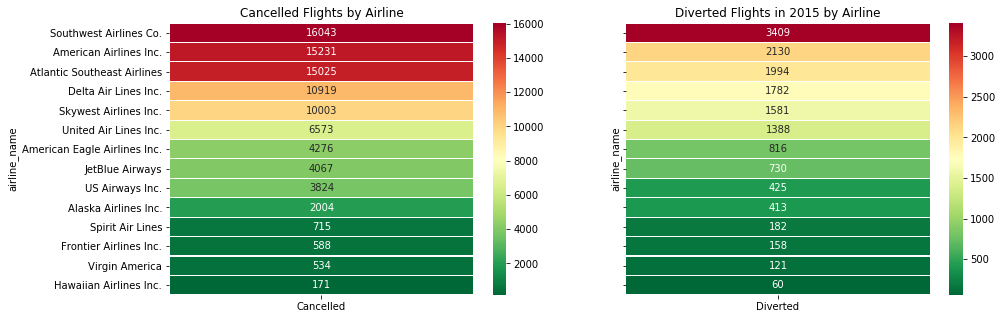

In [195]:
fig, axes=plt.subplots(1,2,sharey=True)
plt.rcParams['figure.figsize'] = (15,5)
sns.heatmap(data=cancelled_df, annot=True, cmap='RdYlGn_r', linewidths=.1, fmt='g', ax=axes[0]).set_title('Cancelled Flights by Airline')
sns.heatmap(data=diverted_df, annot=True, cmap='RdYlGn_r', linewidths=.1, fmt='g',ax=axes[1]).set_title('Diverted Flights in 2015 by Airline')
plt.show()

### Average delays by Airline 
Can draw no conclusions on this yet until I update the dataframe to exclude zeros.

# Need to update, average is incorrect due to zero in dataframe. *remove text when updated*

# Need to rotate all x-axis *remove text when updated*
### Not sure how exactly to do this *remove text when updated*

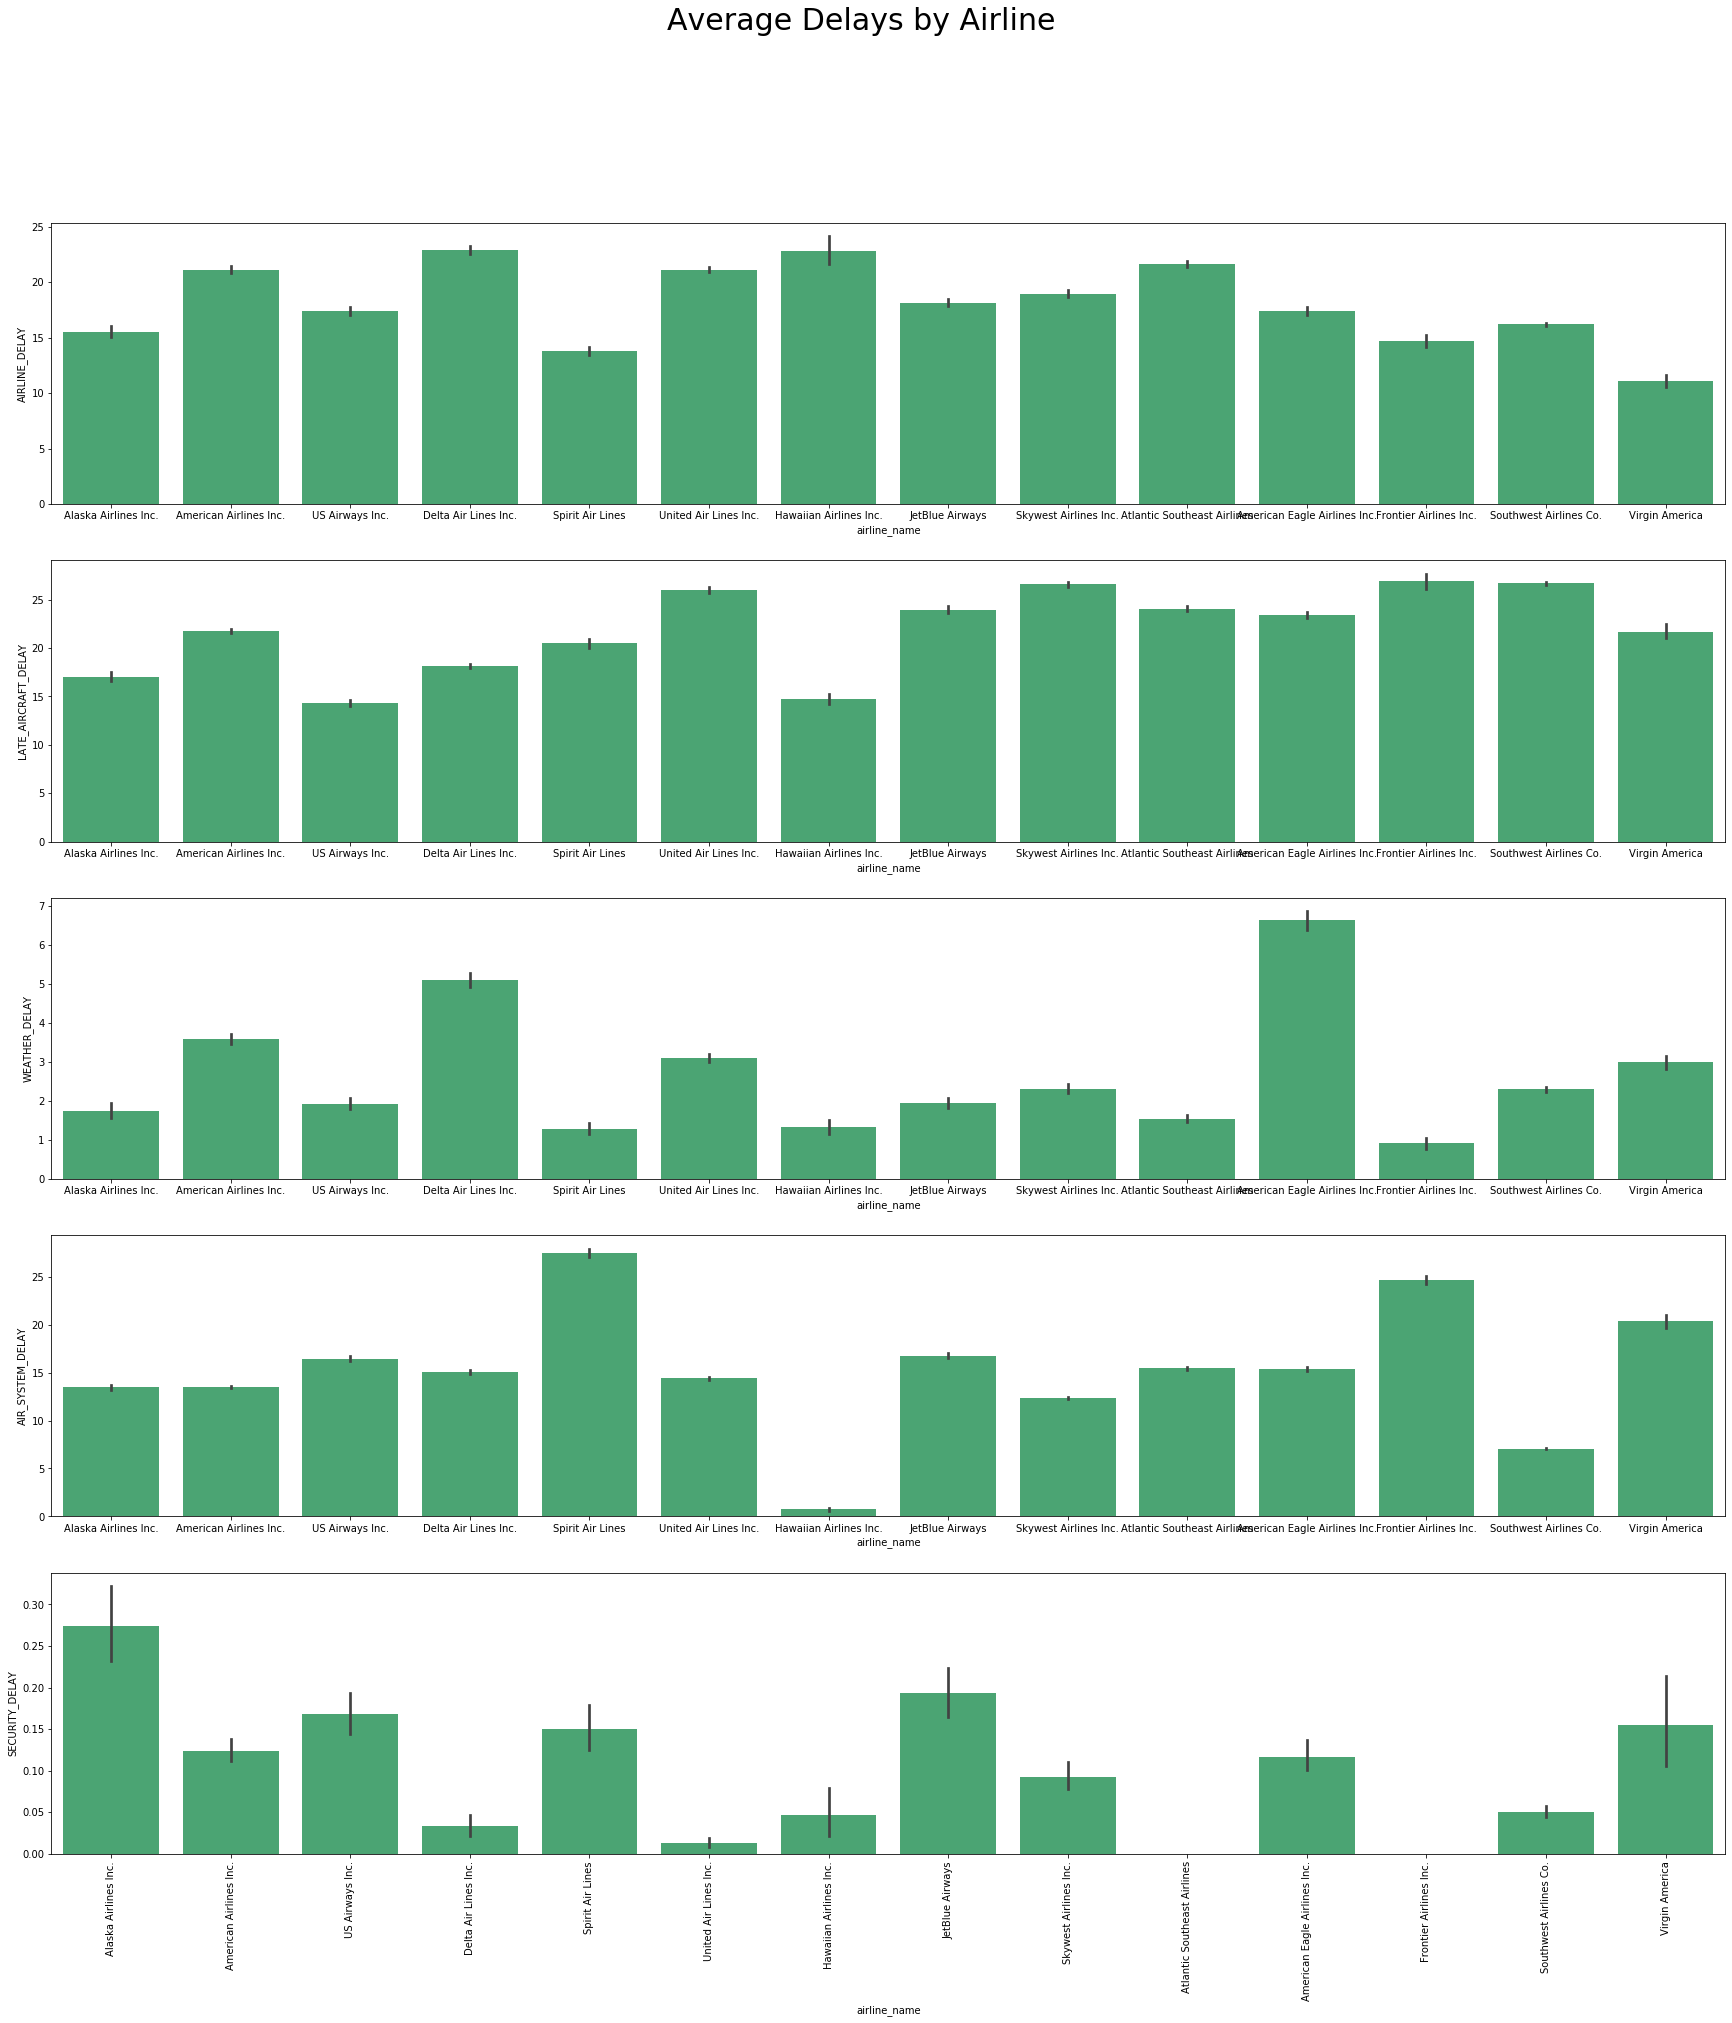

In [279]:
fig, axes = plt.subplots(5,1,figsize=(30,30))
plt.suptitle("Average Delays by Airline", fontsize=30)
plt.xlabel('Airline')
#axes=axes.flatten()
for i, column in enumerate(delays):
    sns.barplot(x='airline_name',y=column, data=df, ax=axes[i], color='mediumseagreen')
    plt.xticks(rotation=90)
    
   

Create dataframe with delay variables and airlines to create a heatmap.

In [173]:
delayed_df = df.groupby(["airline_name"]).mean()[delays]
delayed_sorteddf = delayed_df.sort_values(by=['AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY'], ascending=False)
delayed_sorteddf

,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY
airline_name,,,,,
Delta Air Lines Inc.,22.941028,18.099252,5.108335,15.076578,0.033129
Hawaiian Airlines Inc.,22.792063,14.701671,1.326178,0.724182,0.046531
Atlantic Southeast Airlines,21.651277,24.078400,1.550713,15.459170,0.000000
United Air Lines Inc.,21.144678,26.019098,3.103875,14.422681,0.012462
American Airlines Inc.,21.139201,21.747956,3.587838,13.513774,0.124026
Skywest Airlines Inc.,18.973160,26.609367,2.319619,12.357963,0.092302
JetBlue Airways,18.150503,23.954305,1.956401,16.754728,0.192936
American Eagle Airlines Inc.,17.425025,23.404512,6.644508,15.372752,0.116422
US Airways Inc.,17.410107,14.311199,1.930477,16.470027,0.168623


#### Heat map of all delay variables by airline showing average duration of delay in minutes.
<ul>
    <li> LATE_AIRCRAFT_DELAY and AIRLINE_DELAY have the highest average delay times for all airlines. </li> 
    <li> The cause for delay with American Airlines and American Eagle looks as though is more likely a result of LATE_AIRCRAFT_DELAY or AIRLINE_DELAY </li>
</ul>

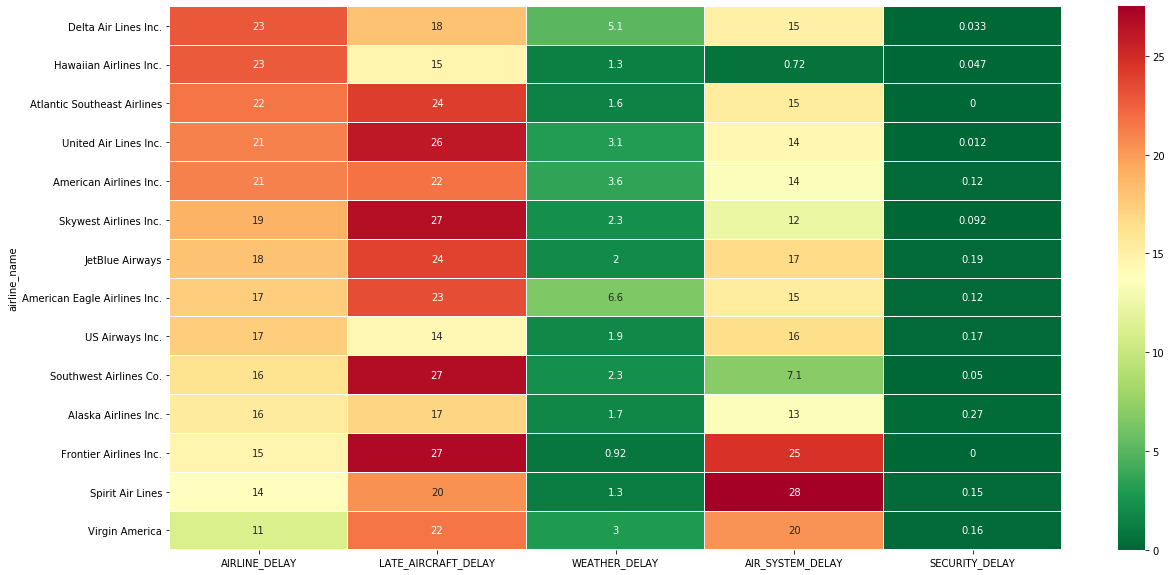

In [179]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.heatmap(data=delayed_sorteddf, annot=True, cmap='RdYlGn_r', linewidths=.1)
plt.show()

**Cancellation Reasons:**
<ul>
<li>(A) Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).</li>
<li>(B) Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.</li>
<li>(C) National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.</li>
<li>(D) Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.</li>
</ul>

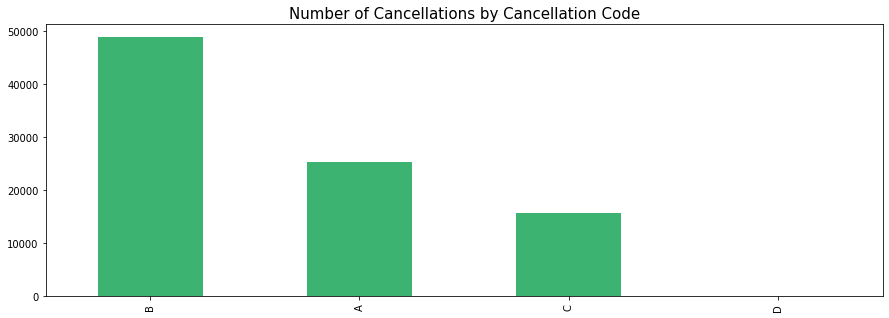

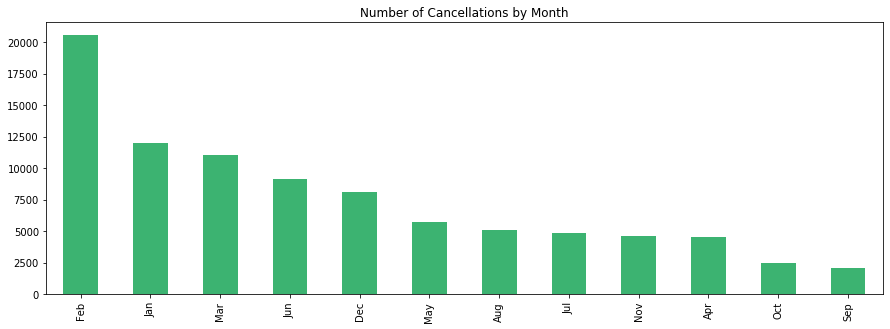

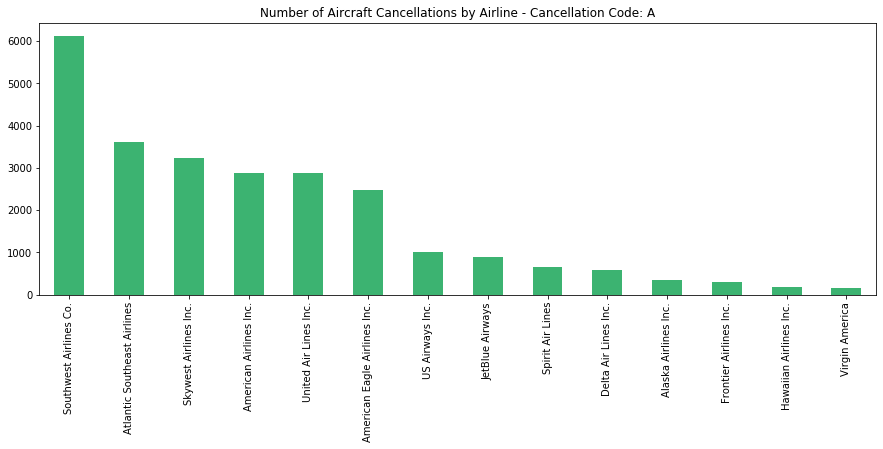

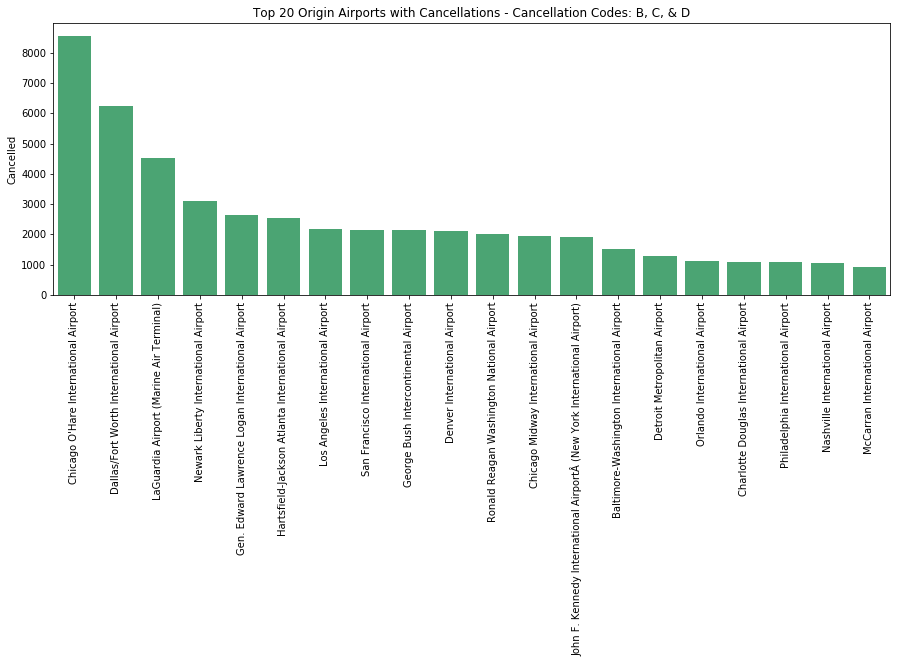

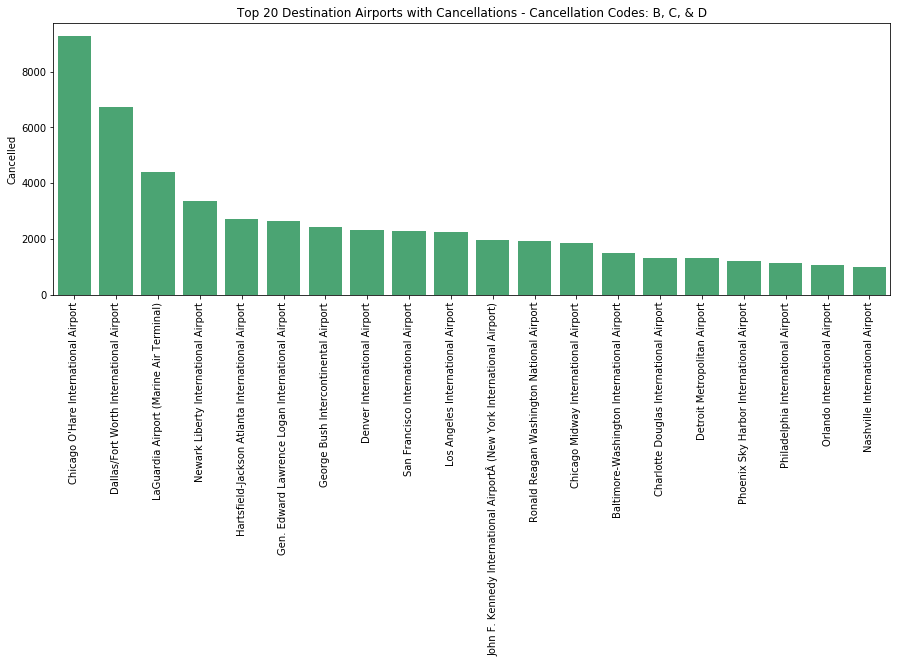

In [282]:
cancelcodes_df=df[df.CANCELLATION_REASON.isin(['A','B','C','D'])] #all cancellation codes
cancelcodes_aircraft_df=df[df.CANCELLATION_REASON.isin(['A'])] #cancellation due to circumstances within the airline's control
cancelcodes_other_df=df[df.CANCELLATION_REASON.isin(['B','C','D'])] #cancellations due to circumstances outside of the airline's control


plt.title("Number of Cancellations by Cancellation Code", fontsize=15)
cancelcodes_df['CANCELLATION_REASON'].value_counts().plot.bar(color='mediumseagreen')
plt.show()

plt.title("Number of Cancellations by Month")
cancelcodes_df['month_s'].value_counts().plot.bar(color='mediumseagreen')
plt.show()


plt.title("Number of Aircraft Cancellations by Airline - Cancellation Code: A") 
cancelcodes_aircraft_df['airline_name'].value_counts().plot.bar(color='mediumseagreen') #within airlines control
plt.show()


plt.title("Top 20 Origin Airports with Cancellations - Cancellation Codes: B, C, & D") 
originairport_counts_df = cancelcodes_df['ORIGIN_AIRPORT_DESC'].value_counts()
originairport_sums_df = pd.DataFrame({'Cancelled':originairport_counts_df})
originairport_top20 = originairport_sums_df.head(20)

sns.barplot(x=originairport_top20.index, y='Cancelled', data=originairport_top20, color='mediumseagreen') #outside airlines control
plt.xticks(rotation=90)
plt.show()


plt.title("Top 20 Destination Airports with Cancellations - Cancellation Codes: B, C, & D") 
destinationairport_counts_df = cancelcodes_df['DESTINATION_AIRPORT_DESC'].value_counts()
destinationairport_sums_df = pd.DataFrame({'Cancelled':destinationairport_counts_df})
destinationairport_top20 = destinationairport_sums_df.head(20)

sns.barplot(x=destinationairport_top20.index, y='Cancelled', data=destinationairport_top20, color='mediumseagreen') #outside airlines control
plt.xticks(rotation=90)
plt.show()


<ul>
    <li> Cancel code (B) Extreme Weather is the most common reason for a flight to be cancelled. </li> 
    <li>Most flights are cancelled in the first few months of the year (Jan, Feb, March) which makes sense as those are winter months where extreme weather is more common. </li> 
    <li>American Airlines and American Eagle Airlines are of the top airlines with cancellated flights in 2015. </li> 
    <li>Chicago, Dallas, LaGuardia, Newark Liberty are the top 4 airports for destination and origin with cancelled flights. </li>
</ul>


# Deep Dive into American Airlines and American Eagle Airlines

In [275]:
#creating dataframe with only American Airlines and American Eagle Airlines data.
american_df=df[df.AIRLINE.isin(['AA','MQ'])]
american_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,COUNTRY_x,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_5DIGIT_IATA_CODE,DESTINATION_AIRPORT_DESC,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,month_s
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,USA,33.94254,-118.40807,14027.0,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559,Jan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,USA,33.94254,-118.40807,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Jan
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,USA,37.61900,-122.37484,11298.0,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,32.89595,-97.03720,Jan
11,2015,1,1,4,AA,1674,N853AA,LAS,MIA,35,...,USA,36.08036,-115.15233,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Jan
21,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,100,...,USA,47.44898,-122.30931,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5823706,2015,12,31,4,AA,1927,N837AW,LAX,IAD,2349,...,USA,33.94254,-118.40807,12264.0,Washington Dulles International Airport,Chantilly,VA,38.94453,-77.45581,Dec
5823710,2015,12,31,4,AA,675,N207UW,HNL,PHX,2350,...,USA,21.31869,-157.92241,14107.0,Phoenix Sky Harbor International Airport,Phoenix,AZ,33.43417,-112.00806,Dec
5823724,2015,12,31,4,AA,1538,N866AA,LAX,MIA,2355,...,USA,33.94254,-118.40807,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Dec
5823742,2015,12,31,4,AA,2342,N3DLAA,DEN,MIA,2359,...,USA,39.85841,-104.66700,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Dec


### Cancellations of American Airlines and American Eagle Airlines
#### Cancellations outside of and within their control
<ul> 
    <li> Most common cancellation reasons </li>
    <li> Airline with most cancellations </li>
    <li> Cancellations by month and by destination and origin airports.</li>
</ul>

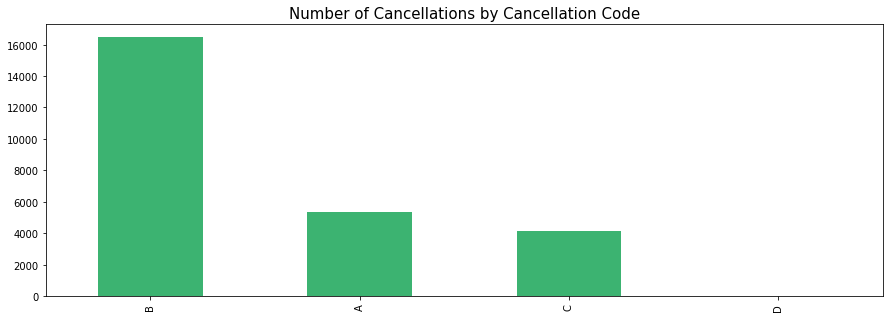

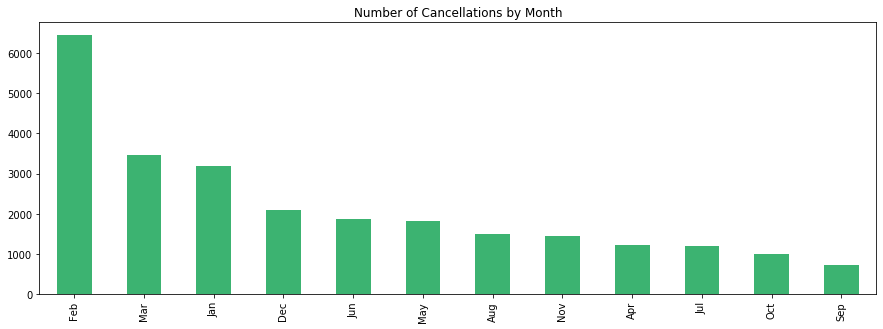

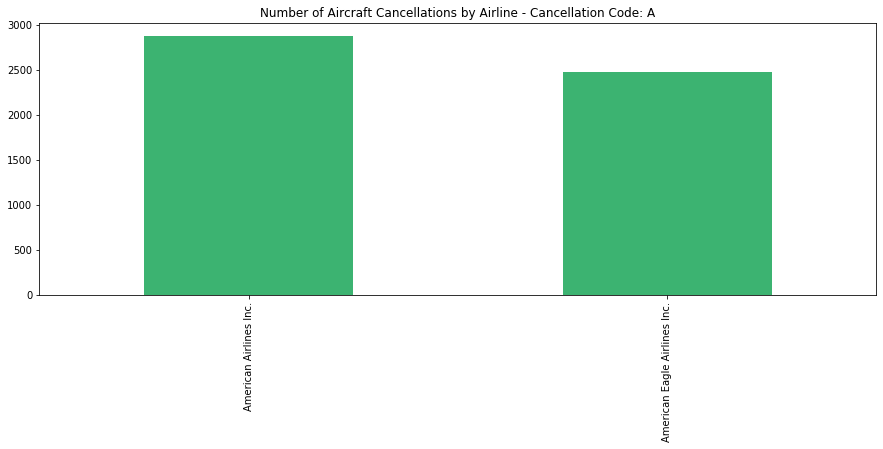

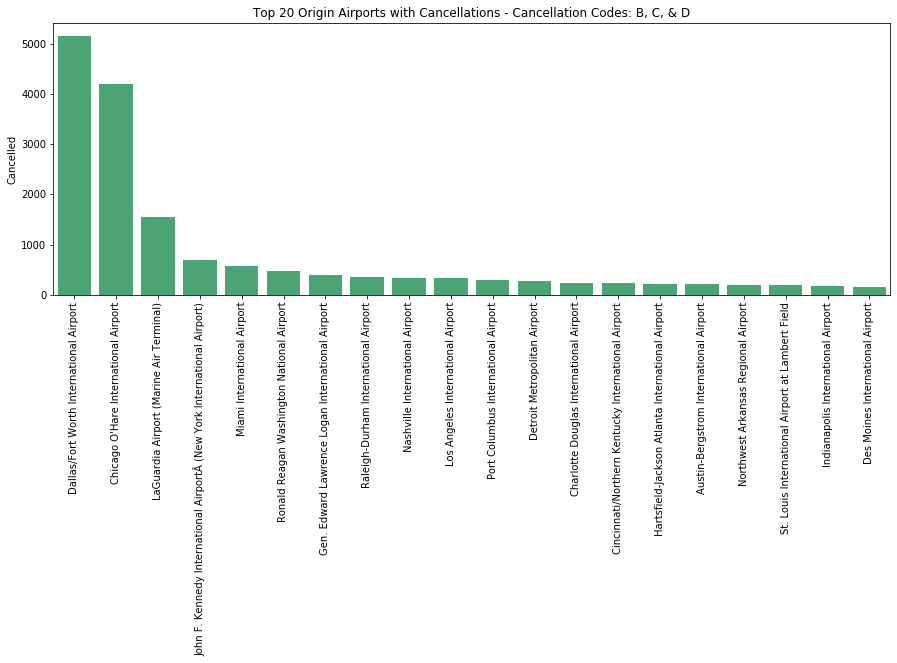

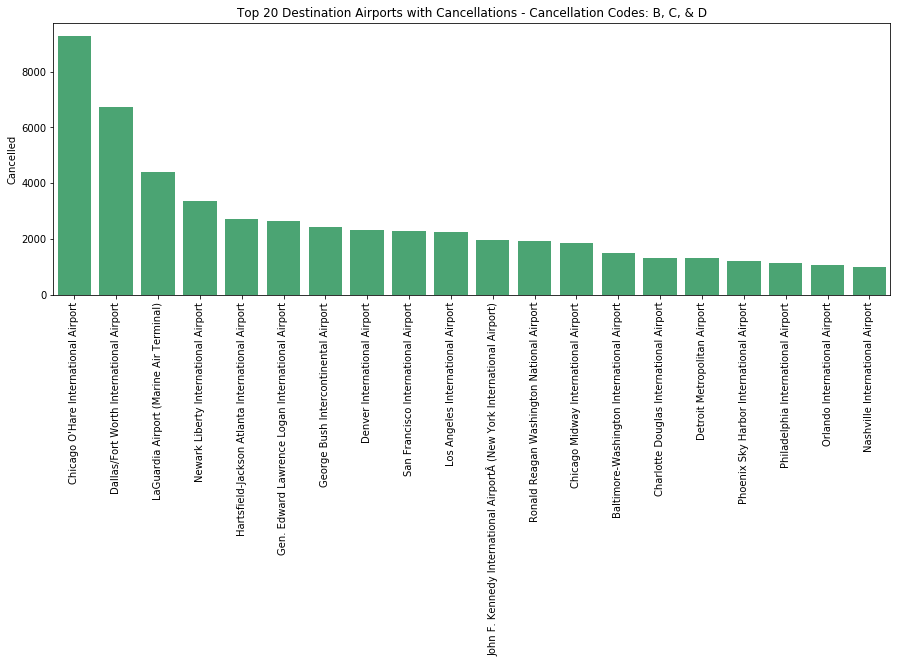

In [284]:
aa_cancelcodes_df=american_df[american_df.CANCELLATION_REASON.isin(['A','B','C','D'])] #all cancellation codes
aa_cancelcodes_aircraft_df=american_df[american_df.CANCELLATION_REASON.isin(['A'])] #cancellation due to circumstances within the airline's control
aa_cancelcodes_other_df=american_df[american_df.CANCELLATION_REASON.isin(['B','C','D'])] #cancellations due to circumstances outside of the airline's control

plt.title("Number of Cancellations by Cancellation Code", fontsize=15)
aa_cancelcodes_df['CANCELLATION_REASON'].value_counts().plot.bar(color='mediumseagreen')
plt.show()

plt.title("Number of Cancellations by Month")
aa_cancelcodes_df['month_s'].value_counts().plot.bar(color='mediumseagreen')
plt.show()

plt.title("Number of Aircraft Cancellations by Airline - Cancellation Code: A")
aa_cancelcodes_aircraft_df['airline_name'].value_counts().plot.bar(color='mediumseagreen') #within airlines control
plt.show()

plt.title("Top 20 Origin Airports with Cancellations - Cancellation Codes: B, C, & D")
aa_originairport_counts_df = aa_cancelcodes_df['ORIGIN_AIRPORT_DESC'].value_counts()
aa_originairport_sums_df = pd.DataFrame({'Cancelled':aa_originairport_counts_df})
aa_originairport_top20 = aa_originairport_sums_df.head(20)

sns.barplot(x=aa_originairport_top20.index, y='Cancelled', data=aa_originairport_top20, color='mediumseagreen') #outside of airlines control
plt.xticks(rotation=90)
plt.show()

plt.title("Top 20 Destination Airports with Cancellations - Cancellation Codes: B, C, & D")
aa_destinationairport_counts_df = cancelcodes_df['DESTINATION_AIRPORT_DESC'].value_counts()
aa_destinationairport_sums_df = pd.DataFrame({'Cancelled':aa_destinationairport_counts_df})
aa_destinationairport_top20 = aa_destinationairport_sums_df.head(20)

sns.barplot(x=aa_destinationairport_top20.index, y='Cancelled', data=aa_destinationairport_top20, color='mediumseagreen') #outside of airlines control
plt.xticks(rotation=90)
plt.show()


<ul>
    <li>Cancel code (B) Extreme Weather is the most common reason for a flight to be cancelled. </li>
    <li>Most flights are cancelled in the first few months of the year (Jan, Feb, March) which makes sense as those are winter months where extreme weather is common. </li>
    <li>American Airlines has more cancelled flights than American Eagle Airlines. which makes sense because American Airlines is a bigger airline and probably has more flights and routes than American Eagle Airlines </li>
    <li>Chicago, Dallas, LaGuardia are the top 3 airports for destination and origin with cancelled flights. They were also in the top 4 airports for destination and origin with cancellations for all airlines</li>
</ul>


### Boxplots
Doesn't show much of a distribution. Data needs to be updated to exclude zeros.

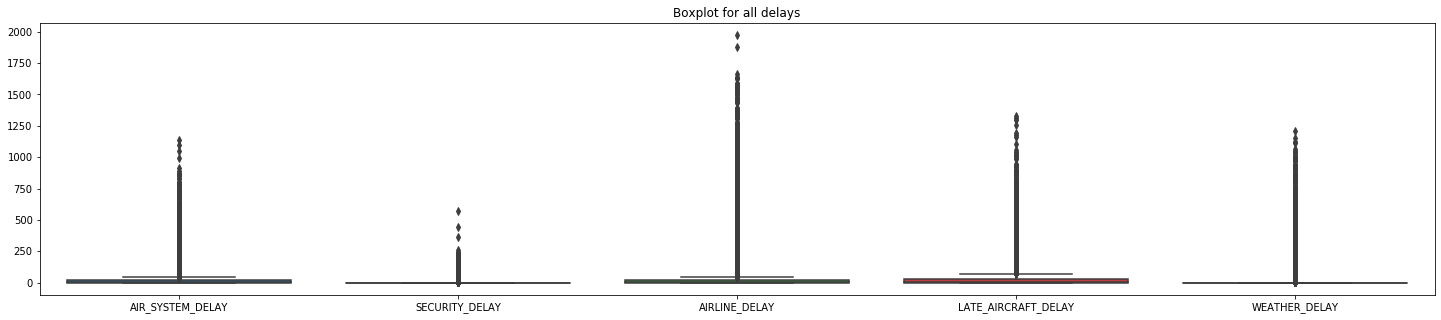

In [80]:
plt.figure(figsize=(25,5))
sns.boxplot(data=df[delays])
plt.title('Boxplot for all delays')
plt.show()

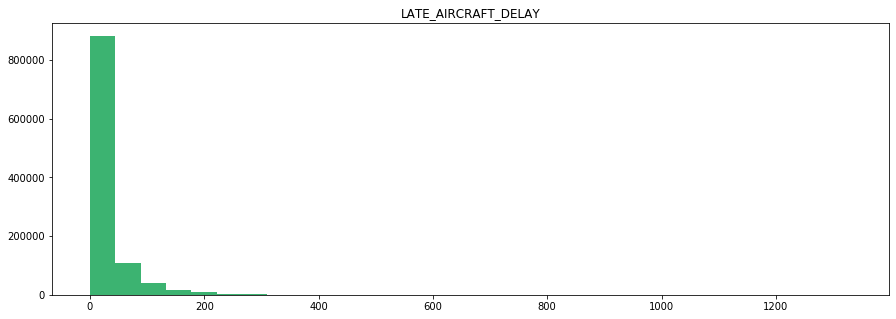

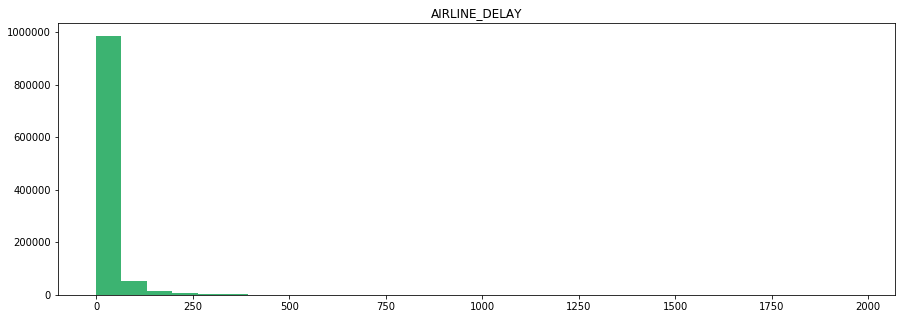

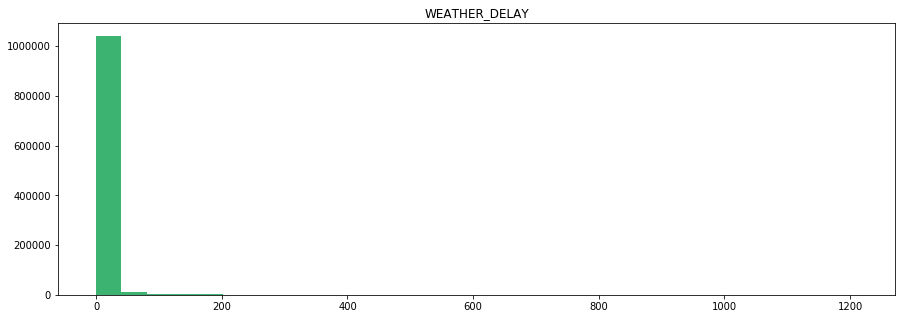

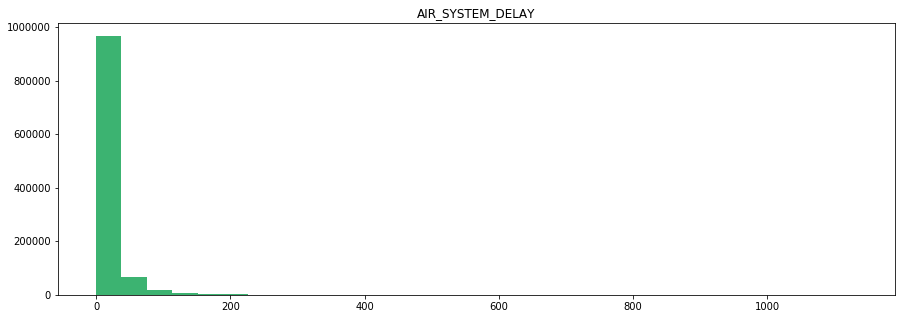

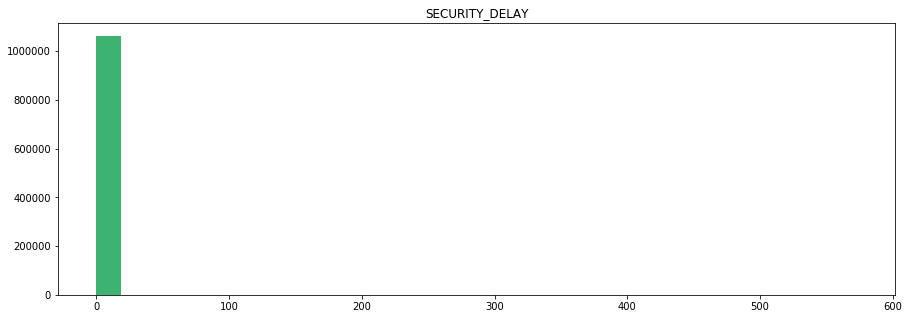

In [213]:
plt.title('LATE_AIRCRAFT_DELAY')
plt.hist(df['LATE_AIRCRAFT_DELAY'], bins=30, color='mediumseagreen')
plt.show()

plt.title('AIRLINE_DELAY')
plt.hist(df['AIRLINE_DELAY'], bins=30, color='mediumseagreen')
plt.show()

plt.title('WEATHER_DELAY')
plt.hist(df['WEATHER_DELAY'], bins=30, color='mediumseagreen')
plt.show()

plt.title('AIR_SYSTEM_DELAY')
plt.hist(df['AIR_SYSTEM_DELAY'], bins=30, color='mediumseagreen')
plt.show()

plt.title('SECURITY_DELAY')
plt.hist(df['SECURITY_DELAY'], bins=30, color='mediumseagreen')
plt.show()

We can see from the boxplots and histograms there is not much of a distribution which make sense because delays are not a common occurrence. When an aircraft is delayed, the delay will be recorded in minutes and all other delay reasons will be marked as zero which explain why all histograms have a high occurance at zero. We can also see that LATE_AIRCRAFT_DELAY and AIRLINE_DELAY have frequencies higher than zero in comparison meaning when delays do occur, it is more often than not due to LATE_AIRCRAFT_DELAY or AIRLINE_DELAY where the delay is recorded in minutes and not zero. 

#### Need to update dataframe to exclude zeros